## Описание

### Цель работы
Вы сотрудник Отдела Data Science популярного музыкального стримингового сервиса "МиФаСоль". Сервис расширяет работу с новыми артистами и музыкантами, в связи с чем возникла задача -- правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. Ваши коллеги из отдела работы со звуком подготовили датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. Ваша задача -- разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.

### Процесс анализа
В ходе работы в пройдете все основные этапы полноценного исследования:
* загрузка и ознакомление с данными,
* предварительная обработка,
* полноценный разведочный анализ,
* разработка новых синтетических признаков,
* проверка на мультиколлинеарность,
* отбор финального набора обучающих признаков,
* выбор и обучение моделей,
* итоговая оценка качества предсказания лучшей модели,
* анализ важности ее признаков.


### Данные
* train.csv - информация (~20000) музыкальных треках, которые будут использоваться в качестве обучающих данных.
* test.csv - информация (~5000) музыкальных треках, которые будут использоваться в качестве тестовых данных. Ваша задача - предсказать значение 'music_genre' для каждого трека из этого датасета.
* sample_submit.csv - файл предсказаний в правильном формате.
* instance_id - идентификатор трека в тестовом наборе.
* music_genre - Целевой признак. Для каждого трека предскажите категориальное значение соответствующее музыкальному жанру трека.


### Описание полей данных
* instance_id - уникальный идентификатор трека
* track_name - название трека
* acousticness - акустичность
* danceability - танцевальность
* duration_ms - продолжительность в милисекундах
* energy - энергичность
* instrumentalness - инструментальность
* key - базовый ключ (нота) произведения
* liveness - привлекательность
* loudness - громкость
* mode - указывает на модальность (мажорную или минорную) трека
* speechiness - выразительность
* tempo - темп
* obtained_date - дата загрузки в сервис
* valence - привлекательность произведения для пользователей сервиса
* music_genre - музыкальный жанр




In [1]:
#!pip install pandas-profiling
if False:
    !pip install mlxtend  
    !pip install --upgrade pip
    !pip install --upgrade Pillow
    !pip install ydata-profiling
    !pip install category-encoders
    !pip install feature-engine
    !pip install optuna
    !pip install ktrain==0.38.*
    !pip install textblob
    !pip install imblearn
    !pip install catboost
    !pip install shap
#!pip uninstall scikit-learn
#!pip install scikit-learn==0.23.2
#!pip install hdbscan
#!pip install Keras-Preprocessing
#!pip install ktrain
#!pip install 'protobuf<=3.20.1' --force-reinstall

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from feature_engine import transformation as vt

from sklearn.cluster import KMeans


from ydata_profiling import ProfileReport
from imblearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
import category_encoders as ce
from feature_engine.encoding import CountFrequencyEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA

from catboost import CatBoostClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import classification_report

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (OrdinalEncoder, StandardScaler, OneHotEncoder,
                                   MinMaxScaler, LabelEncoder, RobustScaler, PolynomialFeatures)
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures

from mlxtend.classifier import EnsembleVoteClassifier

import phik
from phik.report import plot_correlation_matrix
from phik import report

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTEN
from sklearn.ensemble import StackingClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.covariance import EllipticEnvelope
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import IsolationForest

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from joblib import dump, load

import optuna

import shap

D:\anaconda3\envs\ds_practicum_env\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
D:\anaconda3\envs\ds_practicum_env\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [3]:
import nltk
#import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import joblib
from collections import Counter
#from textblob import Word 
from textblob import Word
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras_preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, GRU, Conv1D, MaxPooling1D, Bidirectional
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import re
import ktrain
from ktrain import text
sns.set()
%matplotlib inline
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alexander\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alexander\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Alexander\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Alexander\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Alexander\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\Alexander\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package word

True

In [4]:
train_data = pd.read_csv('./dataset/kaggle_music_genre_train.csv')
test_data = pd.read_csv('./dataset/kaggle_music_genre_test.csv')
external_data = pd.read_csv('./dataset/external_dataset_music_genre.csv')

In [5]:
original_train_data = pd.read_csv('./dataset/kaggle_music_genre_train.csv')
original_test_data = pd.read_csv('./dataset/kaggle_music_genre_test.csv')

In [6]:
train_data.describe(include="all")

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
count,20394.000000,20394,20394.000000,20394.000000,2.039400e+04,20394.000000,20394.000000,19659,20394.000000,20394.000000,19888,20394.000000,19952.000000,20394,20394.000000,20394
unique,NaN,18643,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,2,NaN,NaN,4,NaN,10
top,NaN,Home,NaN,NaN,NaN,NaN,NaN,G,NaN,NaN,Major,NaN,NaN,4-Apr,NaN,Blues
freq,NaN,11,NaN,NaN,NaN,NaN,NaN,2304,NaN,NaN,12828,NaN,NaN,18435,NaN,2858
mean,55973.846916,NaN,0.274783,0.561983,2.203754e+05,0.625276,0.159989,NaN,0.198540,-8.552998,NaN,0.091352,120.942522,NaN,0.464588,NaN
std,20695.792545,NaN,0.321643,0.171898,1.267283e+05,0.251238,0.306503,NaN,0.166742,5.499917,NaN,0.097735,30.427590,NaN,0.243387,NaN
min,20011.000000,NaN,0.000000,0.060000,-1.000000e+00,0.001010,0.000000,NaN,0.013600,-44.406000,NaN,0.022300,34.765000,NaN,0.000000,NaN
25%,38157.250000,NaN,0.015200,0.451000,1.775170e+05,0.470000,0.000000,NaN,0.097300,-10.255750,NaN,0.035600,95.921750,NaN,0.272000,NaN
50%,56030.000000,NaN,0.120000,0.570000,2.195330e+05,0.666000,0.000144,NaN,0.130000,-7.052000,NaN,0.049050,120.012500,NaN,0.457000,NaN
75%,73912.750000,NaN,0.470000,0.683000,2.660000e+05,0.830000,0.084475,NaN,0.253000,-5.054000,NaN,0.095575,141.966250,NaN,0.653000,NaN


In [7]:
test_data.describe(include="all")

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
count,5099.000000,5099,5099.000000,5099.000000,5.099000e+03,5099.000000,5099.000000,4941,5099.000000,5099.000000,4950,5099.000000,4978.000000,5099,5099.000000
unique,NaN,4981,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,2,NaN,NaN,4,NaN
top,NaN,Sorry,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN,Major,NaN,NaN,4-Apr,NaN
freq,NaN,3,NaN,NaN,NaN,NaN,NaN,557,NaN,NaN,3177,NaN,NaN,4597,NaN
mean,55643.871347,NaN,0.276324,0.561888,2.173974e+05,0.622030,0.165198,NaN,0.197924,-8.630186,NaN,0.092718,121.246463,NaN,0.465593
std,20762.384803,NaN,0.322657,0.170502,1.156374e+05,0.251829,0.311940,NaN,0.166241,5.619766,NaN,0.100130,29.875950,NaN,0.244217
min,20012.000000,NaN,0.000002,0.059600,-1.000000e+00,0.001540,0.000000,NaN,0.020400,-46.122000,NaN,0.022600,37.114000,NaN,0.020500
25%,37571.000000,NaN,0.016600,0.451000,1.737335e+05,0.465000,0.000000,NaN,0.096950,-10.231000,NaN,0.035700,96.070250,NaN,0.272000
50%,55246.000000,NaN,0.120000,0.568000,2.175000e+05,0.660000,0.000157,NaN,0.129000,-7.135000,NaN,0.048700,120.053500,NaN,0.458000
75%,73702.000000,NaN,0.460000,0.681000,2.642470e+05,0.826000,0.092750,NaN,0.248000,-5.127000,NaN,0.096550,141.934250,NaN,0.650000


In [8]:
eda_train_sample = train_data.copy()
eda_train_sample.head(10)

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,25143.0,Highwayman,0.480000,0.670,182653.0,0.351,0.017600,D,0.1150,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
1,26091.0,Toes Across The Floor,0.243000,0.452,187133.0,0.670,0.000051,A,0.1080,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
2,87888.0,First Person on Earth,0.228000,0.454,173448.0,0.804,0.000000,E,0.1810,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
3,77021.0,No Te Veo - Digital Single,0.055800,0.847,255987.0,0.873,0.000003,G#,0.3250,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
4,20852.0,Chasing Shadows,0.227000,0.742,195333.0,0.575,0.000002,C,0.1760,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative
5,43934.0,Eskimo Blue Day - Remastered,0.102000,0.308,392893.0,0.590,0.371000,D,0.1120,-11.703,Major,0.0345,145.758,4-Apr,0.496,Blues
6,23450.0,Living On My Own,0.000234,0.655,218267.0,0.687,0.000024,A,0.0869,-11.789,Minor,0.0337,123.923,4-Apr,0.411,Rock
7,28380.0,Para Machuchar Meu Coracao,0.953000,0.591,309813.0,0.109,0.357000,D#,0.0921,-17.975,Major,0.0449,130.597,4-Apr,0.395,Jazz
8,70054.0,In the Mood,0.195000,0.647,283373.0,0.595,0.000118,A#,0.1290,-8.416,Minor,0.0336,73.478,4-Apr,0.546,Jazz
9,74815.0,20.000 Volts,0.032300,0.537,237000.0,0.962,0.193000,C,0.1580,-2.749,Major,0.1210,160.031,4-Apr,0.430,Electronic


<AxesSubplot:>

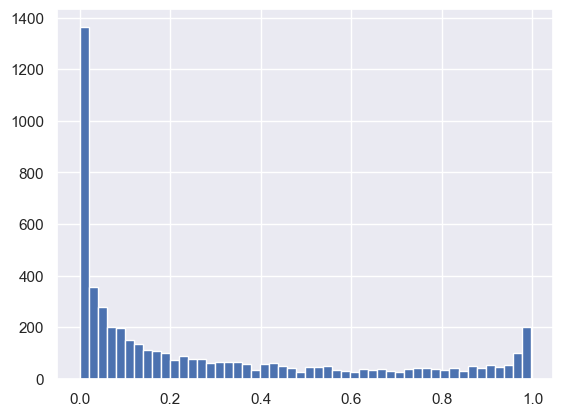

In [9]:
test_data["acousticness"].hist(bins=50)

## EDA. Detailed

#### Processing Pipelines

### Support transformers

#### QuantileFilter

In [10]:
class QuantileFilter():
    def __init__(self, column):
        self.column = column
    
    def fit_transform(self, x, y):
        self.fit(x, y)
        return self.transform(x)

    def fit(self, x, y):
        return self
    
    def transform(self, x):
        temp = x.copy()
        Q1 = temp[self.column].quantile(0.15)
        Q3 = temp[self.column].quantile(0.90)
        IQR = Q3 - Q1
        
        print(self.column, "> ","Q1: ", Q1, " | Q3: ", Q3, " | IQR: ", IQR)
        temp = temp[(temp[self.column] >= (Q1 - 1.5 * IQR)) & (temp[self.column] <= (Q3 + 1.5 * IQR))]
        print(f"Original dataset{self.column} len:", len(x))
        print(f"Filtered dataset{self.column} len:", len(temp))
        return temp

#### CheckModel

In [11]:
def checkModel(vfeatures, target, model, random_over_sampler=False):
    target = target.copy()
    features = vfeatures.copy()

    if random_over_sampler:
        ada = RandomOverSampler(random_state=42)
        features, target = ada.fit_resample(features, target)

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25)
    model.fit(x_train, y_train)
    predicted = model.predict(x_test)
    f1score_temp = f1_score(y_test, predicted, average='weighted')
    print("Result f1 score:", f1score_temp)
    print(classification_report(y_test, predicted, zero_division=1.0))
    eda_train_sample.groupby('music_genre')['music_genre'].count()

#### Print Distribution with mustash

In [12]:
def printDistrAndMustash(dataset, column):
    print("Columns {column} nulls:", dataset[column].isnull().sum())
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
    dataset[column].hist(bins=100, ax=axes[0])

    if dataset[column].dtype != 'object':
        dataset.boxplot(column=column, ax=axes[1])

### Define prepartion pipelines

### Instance_id
instance_id - уникальный идентификатор записи.
Данный признак не несет полезной информации для обучения, поэтому должен быть удален.

### Track_name
Название трека - фича не особо применивая к обучению.
Очень мало данных для получения каких-то косвенных признаков.
Необходимо удалить.

### Acousticness

Columns {column} nulls: 0


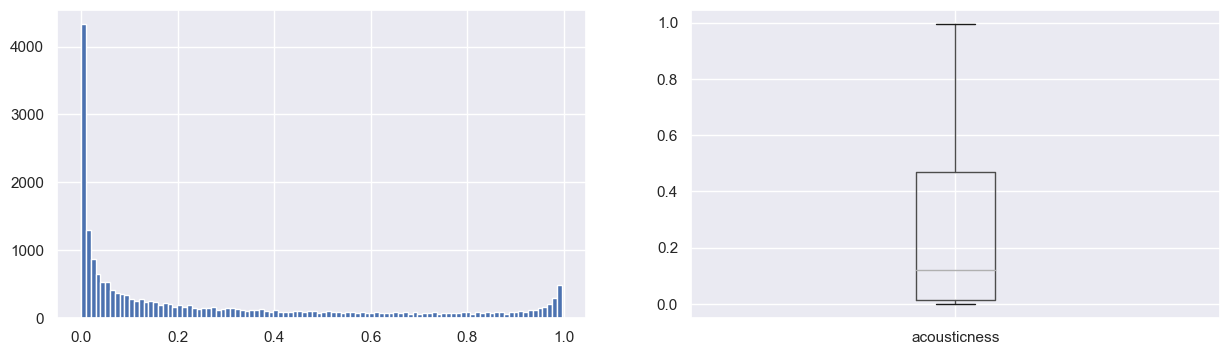

In [13]:
printDistrAndMustash(eda_train_sample, "acousticness")

Отсутствуют пропуски.
Распределение данных больше похоже на Пуассона.
Скорее всего, данные признак нельзя будет успешно использовать с логистической регрессией.
Возможно, использую этот признак можно будет создать синтетические признаки.

### Danceability

Columns {column} nulls: 0


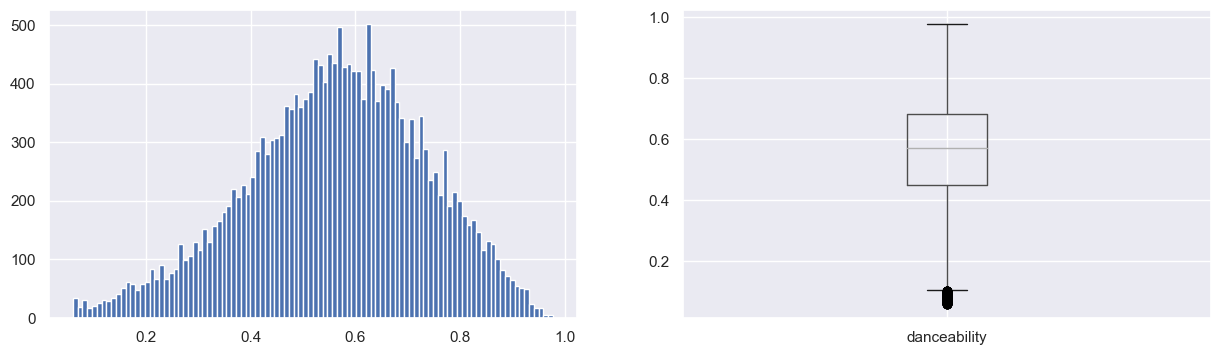

In [14]:
printDistrAndMustash(eda_train_sample, "danceability")

Отсутствуют пропуски, но на боксплоте есть некоторое колличество выборосов, которые необходимо проанализировать.

danceability >  Q1:  0.382  | Q3:  0.782  | IQR:  0.4
Original datasetdanceability len: 20394
Filtered datasetdanceability len: 20394
Columns {column} nulls: 0


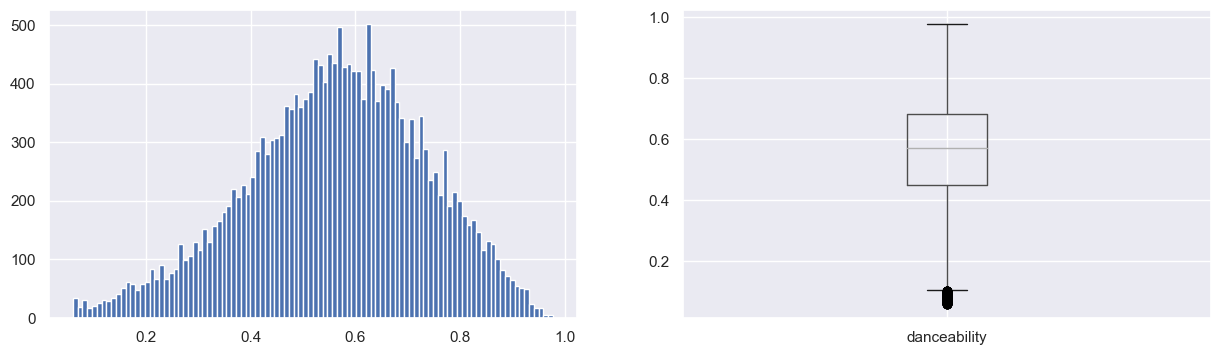

In [15]:
temp_danc = QuantileFilter("danceability").transform(eda_train_sample)
printDistrAndMustash(temp_danc, "danceability")

Применили и отфильтровали выборосы.
На текущий момент, остается небольшое количество данных на самой границе квантильных допусков, что по большей части допустимо на текущий момент.
Потеря данных составляются 111 строк, что тоже допустимо при текущем размере датасета.

### Duration(MS)

Columns {column} nulls: 0


count    2.039400e+04
mean     2.203754e+05
std      1.267283e+05
min     -1.000000e+00
25%      1.775170e+05
50%      2.195330e+05
75%      2.660000e+05
max      4.497994e+06
Name: duration_ms, dtype: float64

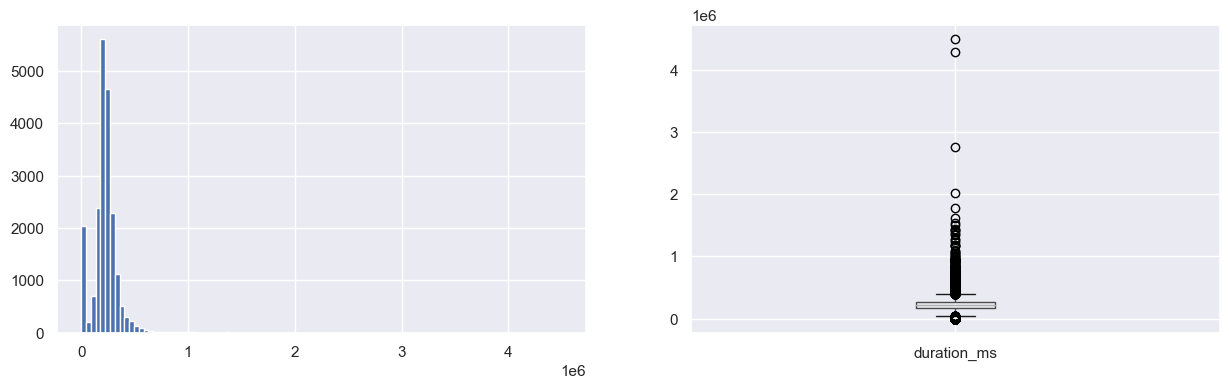

In [16]:
printDistrAndMustash(eda_train_sample, "duration_ms")
eda_train_sample["duration_ms"].describe()

Приствуют отрицатальные значения.
По сути, это пропуски и нужно будет заполнить.


### Energy

Columns {column} nulls: 0


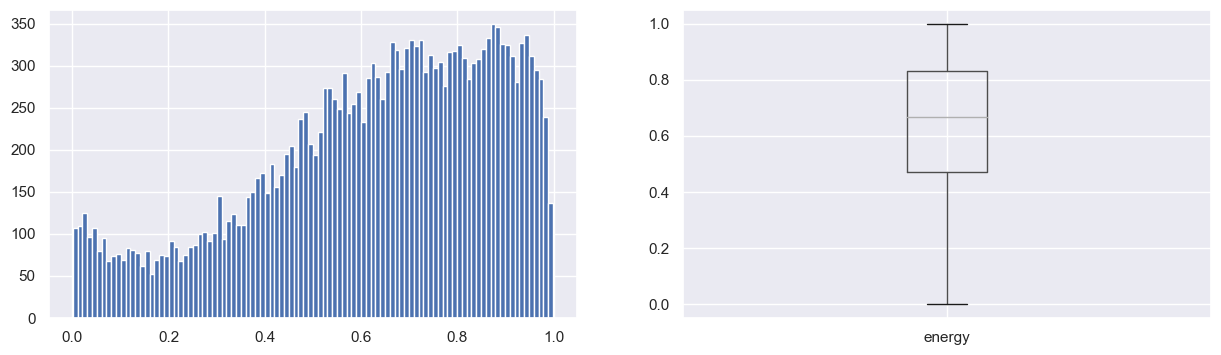

In [17]:
printDistrAndMustash(eda_train_sample, "energy")

### Instrumentalness

Columns {column} nulls: 0
Count of ouliers <= 0: 5978
Count of ouliers >=0.2: 4365


4365

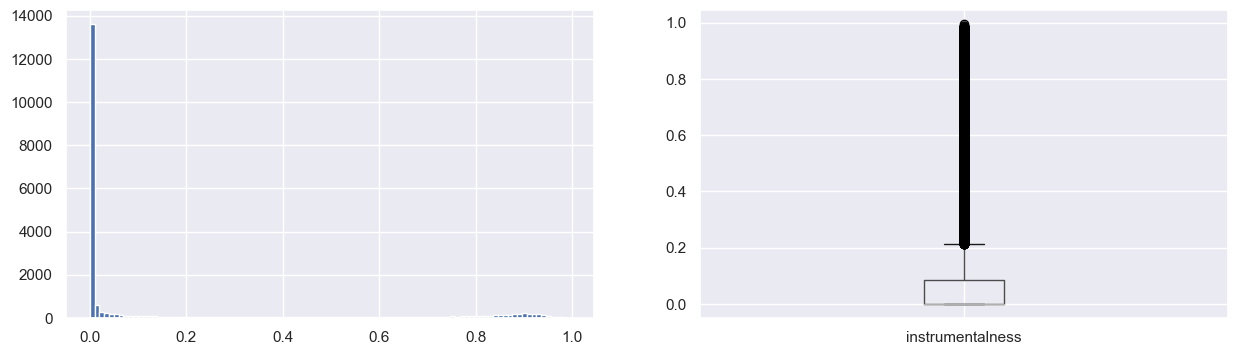

In [18]:
printDistrAndMustash(eda_train_sample, "instrumentalness")
print("Count of ouliers <= 0:", len(eda_train_sample[eda_train_sample["instrumentalness"] <= 0]))
print("Count of ouliers >=0.2:", len(eda_train_sample[eda_train_sample["instrumentalness"] >= 0.2]))
len(eda_train_sample[eda_train_sample["instrumentalness"] >= 0.2])

Данная фича содержит большое количество выбросов.
Нужно будет обратить внимание, как влияет данный параметр на конечный результат.
На текущий момент, применим квантильный фильтр.

instrumentalness >  Q1:  0.0  | Q3:  0.821  | IQR:  0.821
Original datasetinstrumentalness len: 20394
Filtered datasetinstrumentalness len: 20394
Columns {column} nulls: 0
Count of ouliers <= 0: 5978
Count of ouliers >=0.2: 4365


4365

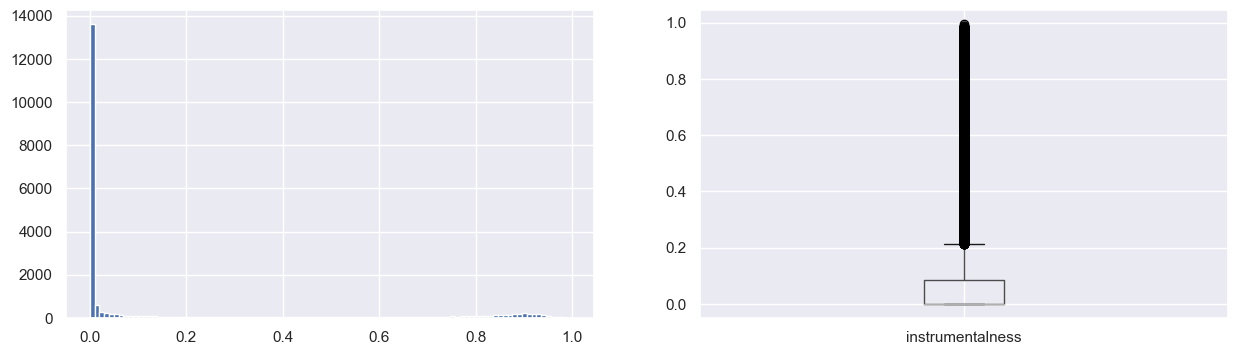

In [19]:
temp_instr = QuantileFilter("instrumentalness").transform(eda_train_sample)
printDistrAndMustash(eda_train_sample, "instrumentalness")
print("Count of ouliers <= 0:", len(temp_instr[temp_instr["instrumentalness"] <= 0]))
print("Count of ouliers >=0.2:", len(temp_instr[temp_instr["instrumentalness"] >= 0.2]))
len(temp_instr[temp_instr["instrumentalness"] >= 0.2])

После применения фильтра, было отброшено почти 0.25 всех данных.
Это значительный набор данных, а значит стоит задуматься об исключении этой фичи из обучающего набора.

### Liveness

Columns {column} nulls: 0
liveness >  Q1:  0.0838  | Q3:  0.3779999999999999  | IQR:  0.2941999999999999
Original datasetliveness len: 20394
Filtered datasetliveness len: 20080
Columns {column} nulls: 0


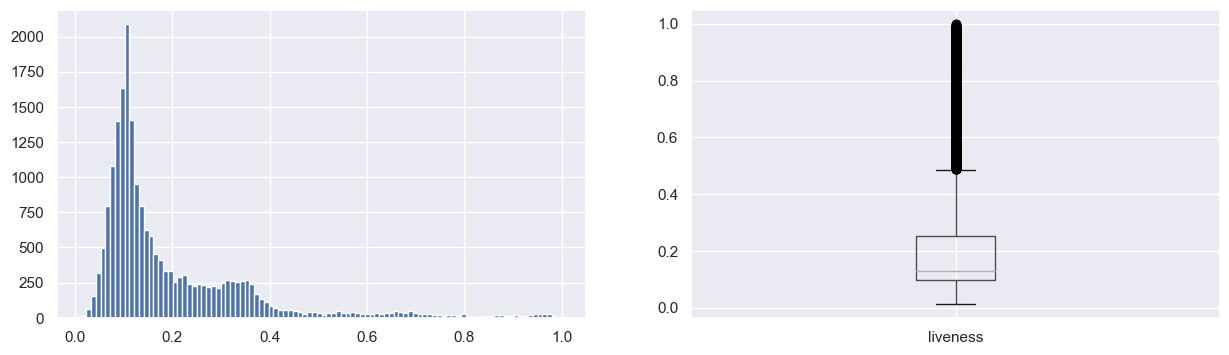

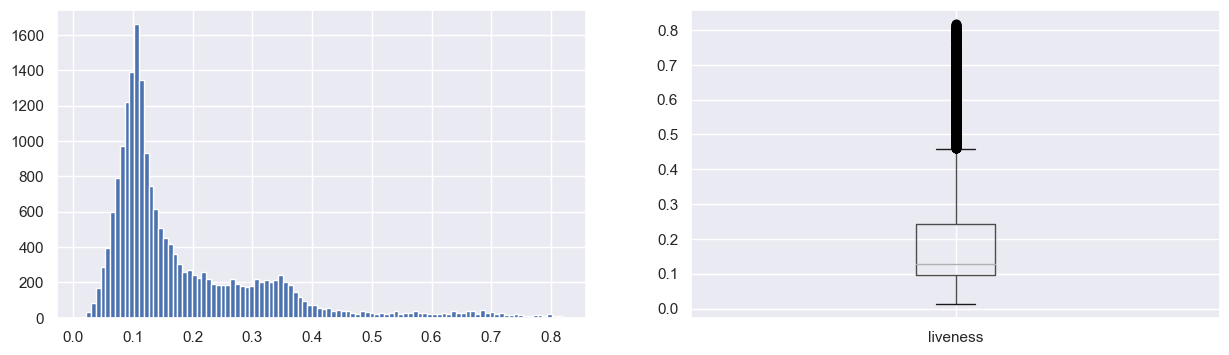

In [20]:
printDistrAndMustash(eda_train_sample, "liveness")
temp_liveness = QuantileFilter("liveness").transform(eda_train_sample)
printDistrAndMustash(temp_liveness, "liveness")

Почистили данные и потеряли почти 1000 записей.
Как результат, пролучили распределение с более коротким хвостом, что потенциально может улучшить качество моделей.

### Loudness

Columns {column} nulls: 0
loudness >  Q1:  -12.765150000000002  | Q3:  -3.713  | IQR:  9.052150000000001
Original datasetloudness len: 20394
Filtered datasetloudness len: 19991
Columns {column} nulls: 0


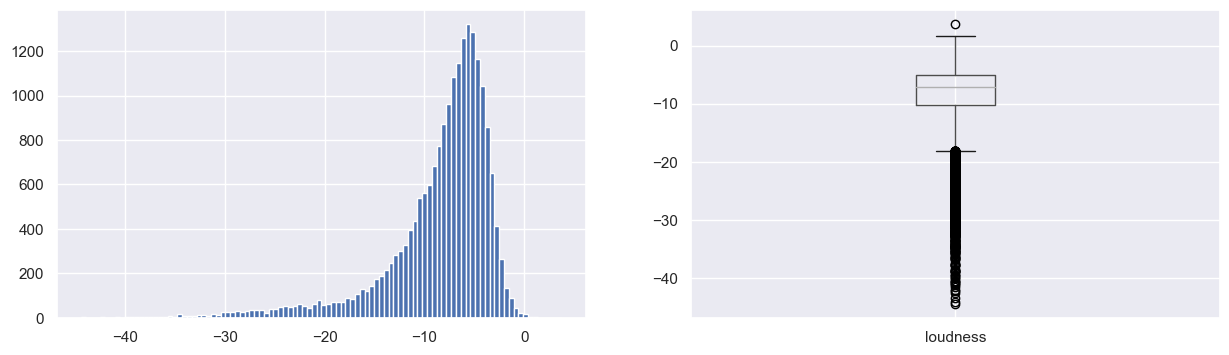

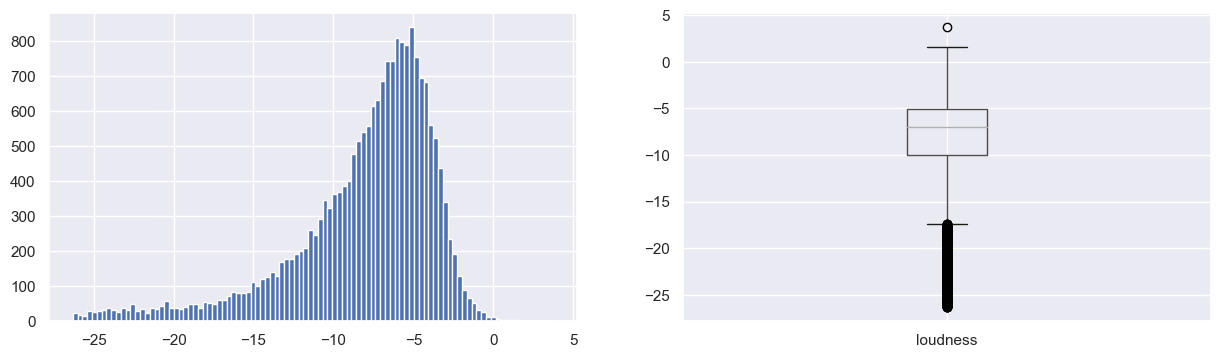

In [21]:
printDistrAndMustash(eda_train_sample, "loudness")
temp_loudness = QuantileFilter("loudness").transform(eda_train_sample)
printDistrAndMustash(temp_loudness, "loudness")

### Key

Columns {column} nulls: 735


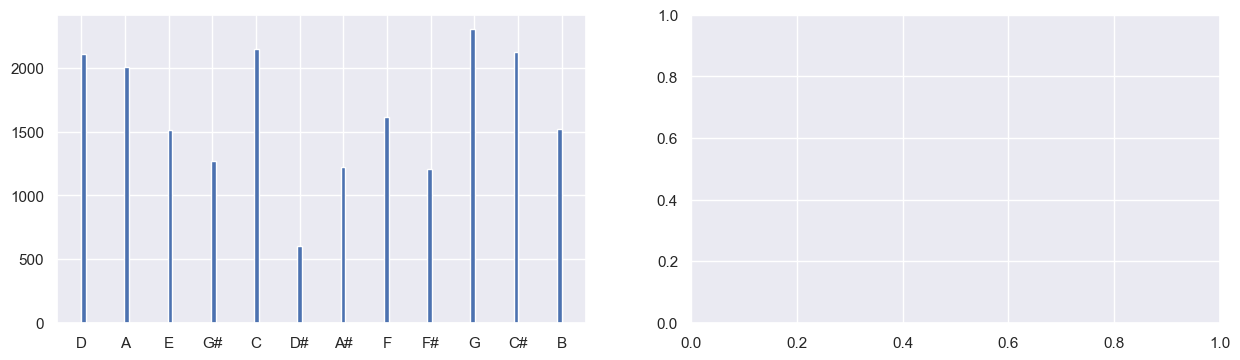

In [22]:
printDistrAndMustash(eda_train_sample, "key")

### Mode

Columns {column} nulls: 506


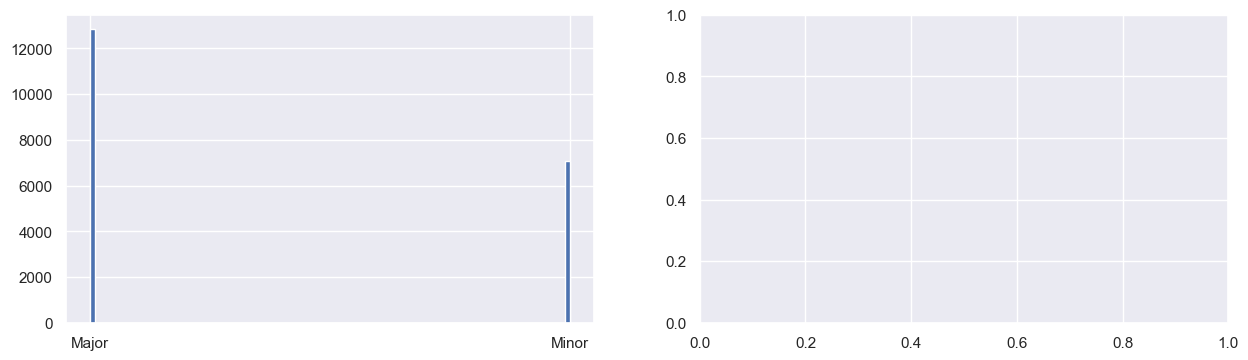

In [23]:
printDistrAndMustash(eda_train_sample, "mode")

### Tempo

Columns {column} nulls: 442


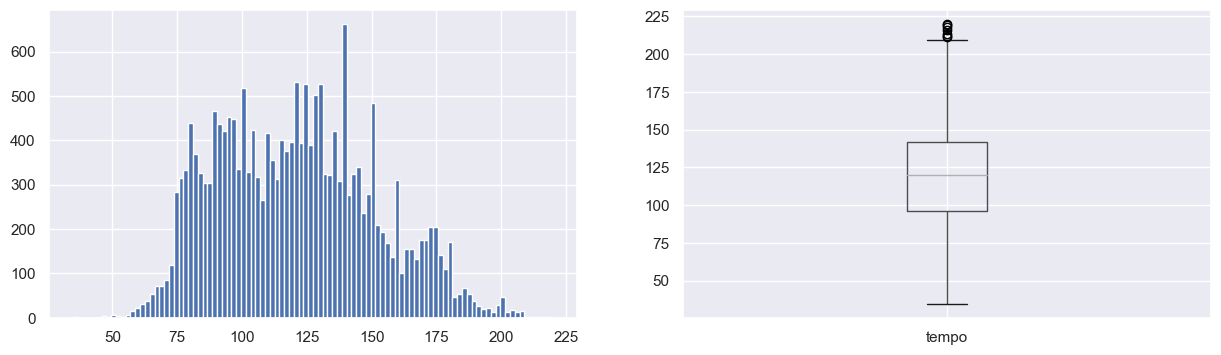

In [24]:
printDistrAndMustash(eda_train_sample, "tempo")

### Speechiness

Columns {column} nulls: 0


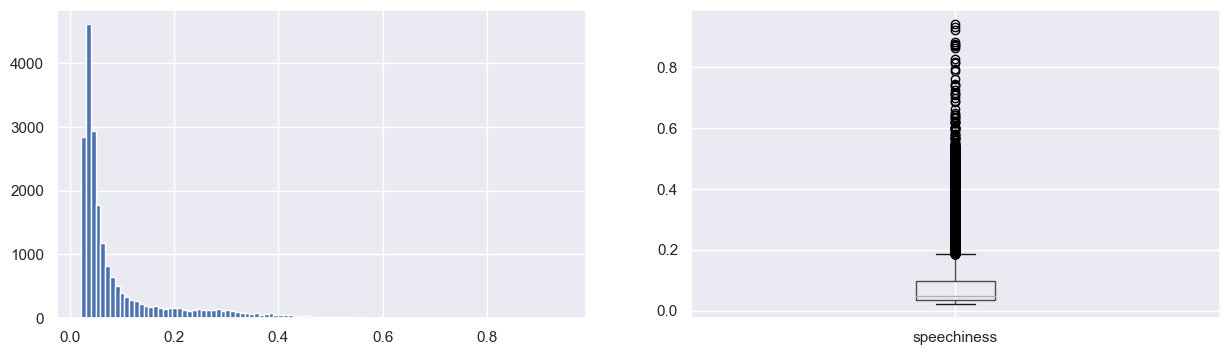

In [25]:
printDistrAndMustash(eda_train_sample, "speechiness")

speechiness >  Q1:  0.0318  | Q3:  0.238  | IQR:  0.2062
Original datasetspeechiness len: 20394
Filtered datasetspeechiness len: 20338
Columns {column} nulls: 0


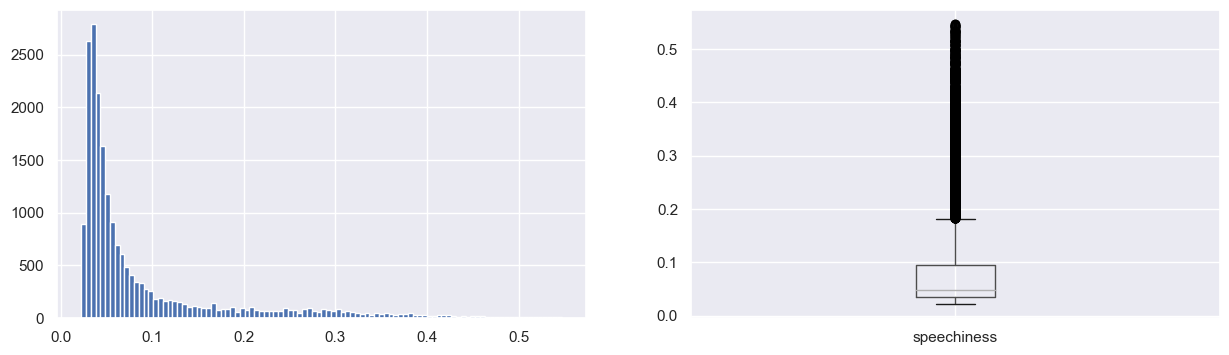

In [26]:
temp_mode = QuantileFilter("speechiness").transform(eda_train_sample)
printDistrAndMustash(temp_mode, "speechiness")

### Obtained Date

In [27]:
eda_train_sample["obtained_date"].unique()

array(['4-Apr', '3-Apr', '5-Apr', '1-Apr'], dtype=object)

### Valence

Columns {column} nulls: 0


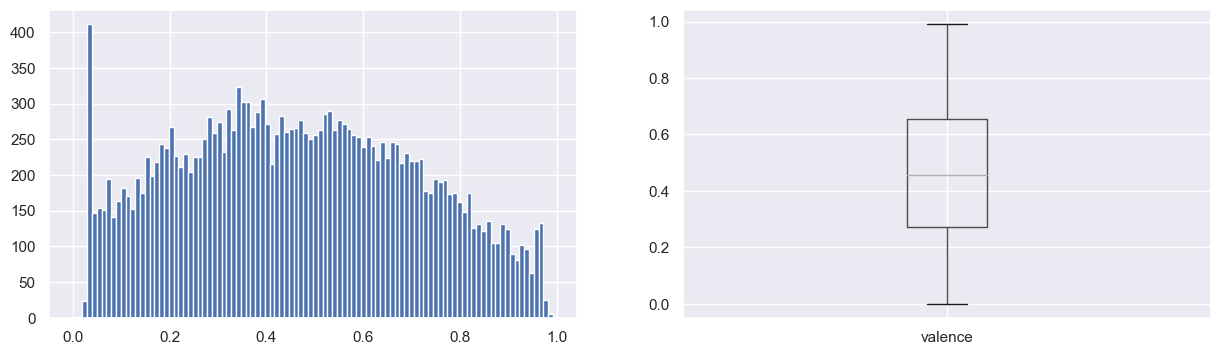

In [28]:
printDistrAndMustash(eda_train_sample, "valence")

In [29]:
eda_train_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

### Genre analysing

Columns {column} nulls: 0


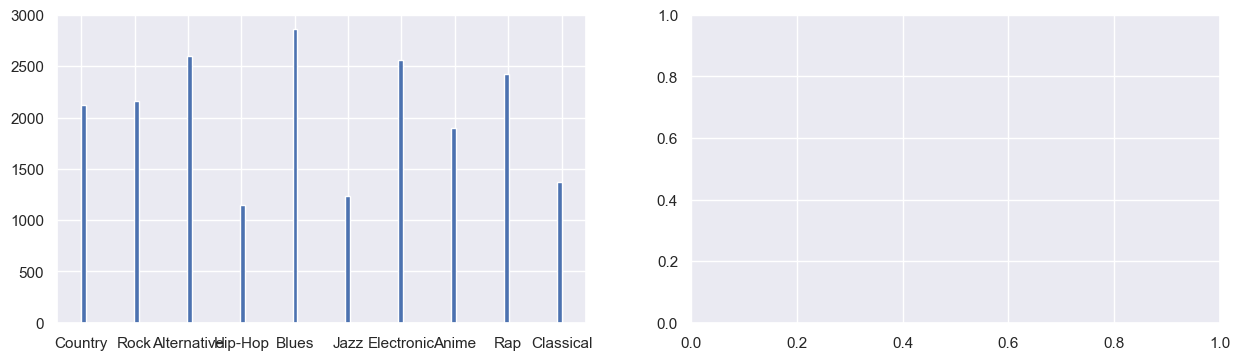

In [30]:
printDistrAndMustash(eda_train_sample, "music_genre")

## Head-on Train Data Preparation

### Make transformation pipeline

In [31]:
EXTRA_COLUMNS = ['instance_id', 'track_name', 'obtained_date']

dataset = train_data.copy()
dataset[dataset["duration_ms"] <= 0] = np.nan
dataset = dataset.drop(columns = EXTRA_COLUMNS, axis=1)

CATEGORIAL_COLUMNS = dataset.select_dtypes(exclude='number').columns.tolist()
NUMERIC_COLUMNS = dataset.select_dtypes(include='number').columns.tolist()

CATEGORIAL_COLUMNS.remove("music_genre")

iterate_imp = IterativeImputer(max_iter=10, random_state=42)
robust_scaler = RobustScaler()
drop_constants = DropConstantFeatures(tol=0.998)

cat_simple_imputer = SimpleImputer(strategy='most_frequent')
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

filter_outliers_in_liveness = QuantileFilter("liveness")
filter_outliers_in_loudness = QuantileFilter("loudness")
filter_outliers_in_tempo = QuantileFilter("tempo")

NUMERIC_TRANSFORMATION_PIPELINE = Pipeline(steps=[
    ('impute', iterate_imp),
    ('scale', robust_scaler),
    ('drop_constant_features', drop_constants)
])

CATEGORY_TRANSFORMATION_PIPELINE = Pipeline(steps=[
    ('impute', cat_simple_imputer),
    ('encode', ordinal_encoder)
])

DEFAULT_TRANSFORMATION_PIPELINE = ColumnTransformer(transformers=[
    ('num_pipeline', NUMERIC_TRANSFORMATION_PIPELINE, NUMERIC_COLUMNS),
    ('cat_pipeline', CATEGORY_TRANSFORMATION_PIPELINE, CATEGORIAL_COLUMNS)
], remainder='passthrough')

DEFAULT_PIPELINE = Pipeline(steps=[
    ('transform_dataset', DEFAULT_TRANSFORMATION_PIPELINE),
])

temp_train_features = train_data.copy().drop(columns = EXTRA_COLUMNS, axis=1)
temp_test_features = test_data.copy().drop(columns = EXTRA_COLUMNS, axis=1)
train_target = temp_train_features.pop("music_genre")


train_data = DEFAULT_PIPELINE.fit_transform(temp_train_features, train_target)
train_data = pd.DataFrame(train_data)
train_data.columns = DEFAULT_PIPELINE.named_steps["transform_dataset"].transformers[0][2] + DEFAULT_PIPELINE.named_steps["transform_dataset"].transformers[1][2]
train_data["music_genre"] = train_target

test_data = DEFAULT_PIPELINE.transform(temp_test_features)
test_data = pd.DataFrame(test_data)
test_data.columns = DEFAULT_PIPELINE.named_steps["transform_dataset"].transformers[0][2] + DEFAULT_PIPELINE.named_steps["transform_dataset"].transformers[1][2]

In [32]:
train_data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode,music_genre
0,0.791557,0.431034,-0.416803,-0.875000,0.206641,-0.096339,-1.882059,-0.045852,-0.414651,-0.018373,5.0,0.0,Country
1,0.270449,-0.508621,-0.366172,0.011111,-0.001103,-0.141297,-0.257606,-0.230930,-0.154671,0.215223,0.0,1.0,Rock
2,0.237467,-0.500000,-0.520835,0.383333,-0.001705,0.327553,0.351228,5.368070,-0.868542,-0.296588,7.0,1.0,Alternative
3,-0.141161,1.193966,0.411989,0.575000,-0.001667,1.252408,0.431970,0.522718,-0.089359,1.335958,11.0,1.0,Hip-Hop
4,0.235268,0.741379,-0.273499,-0.252778,-0.001684,0.295440,0.288749,-0.005836,-0.968334,0.330709,3.0,0.0,Alternative


In [33]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      5099 non-null   float64
 1   danceability      5099 non-null   float64
 2   duration_ms       5099 non-null   float64
 3   energy            5099 non-null   float64
 4   instrumentalness  5099 non-null   float64
 5   liveness          5099 non-null   float64
 6   loudness          5099 non-null   float64
 7   speechiness       5099 non-null   float64
 8   tempo             5099 non-null   float64
 9   valence           5099 non-null   float64
 10  key               5099 non-null   float64
 11  mode              5099 non-null   float64
dtypes: float64(12)
memory usage: 478.2 KB


In [34]:
test_data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode
0,0.397977,0.806034,-0.828634,0.036111,-0.001705,1.111111,-0.016148,5.117966,-0.659860,1.149606,1.0,1.0
1,0.919085,-1.353448,0.235379,-0.397222,0.096786,-0.289660,0.360840,-0.327637,-0.926268,-0.364829,11.0,0.0
2,-0.251033,0.465517,0.728581,0.288889,-0.001705,-0.134875,0.510021,2.883702,-0.667890,-0.118110,0.0,1.0
3,-0.219217,0.094828,-0.476690,0.230556,-0.001705,-0.051381,0.470611,-0.012505,0.890298,0.412073,2.0,0.0
4,-0.263116,-0.642241,-2.481087,-0.608333,0.173495,-0.594733,-0.342385,2.550229,-1.027595,-0.881890,5.0,0.0


In [35]:
headon_research_train_sample = train_data.copy()

### Store transformed datasets

### Linear Correlations

<AxesSubplot:>

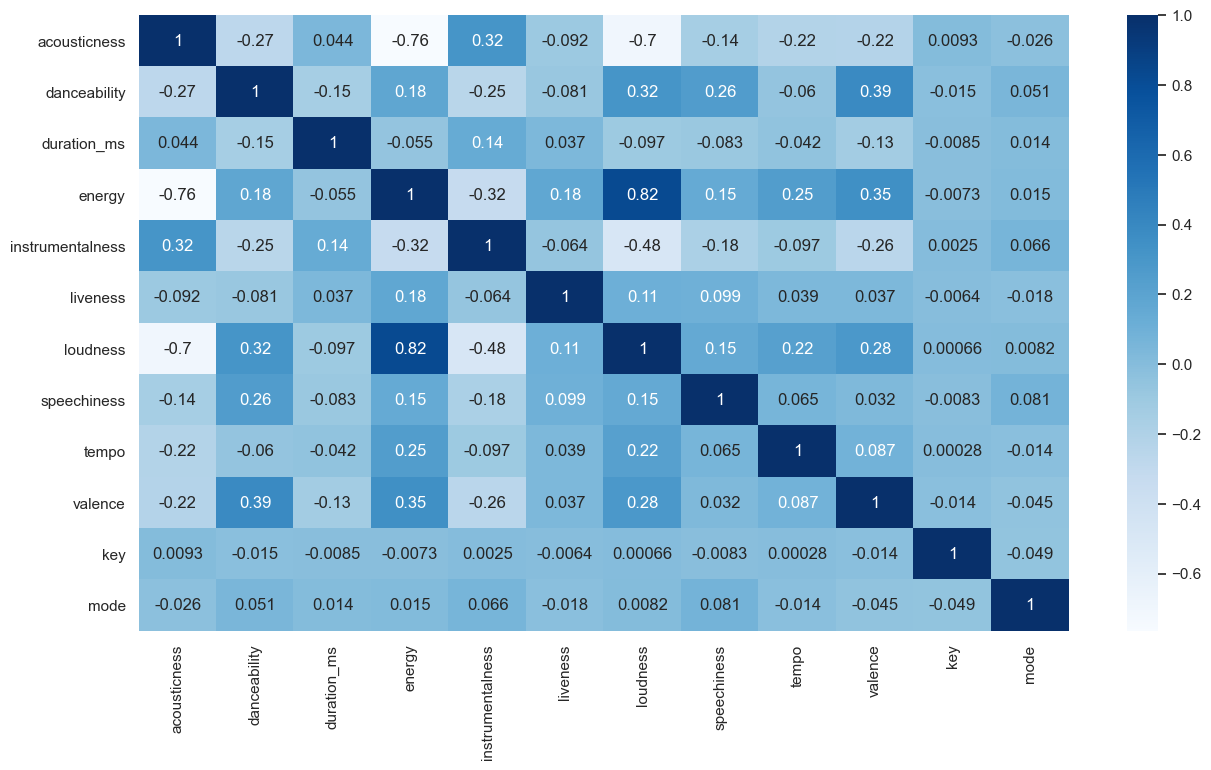

In [36]:
f, ax = plt.subplots(figsize=(15, 8))

corr = train_data.corr()
sb.heatmap(corr, cmap="Blues", annot=True , ax=ax)

### Phik Correlations

interval columns not set, guessing: ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'key', 'mode']


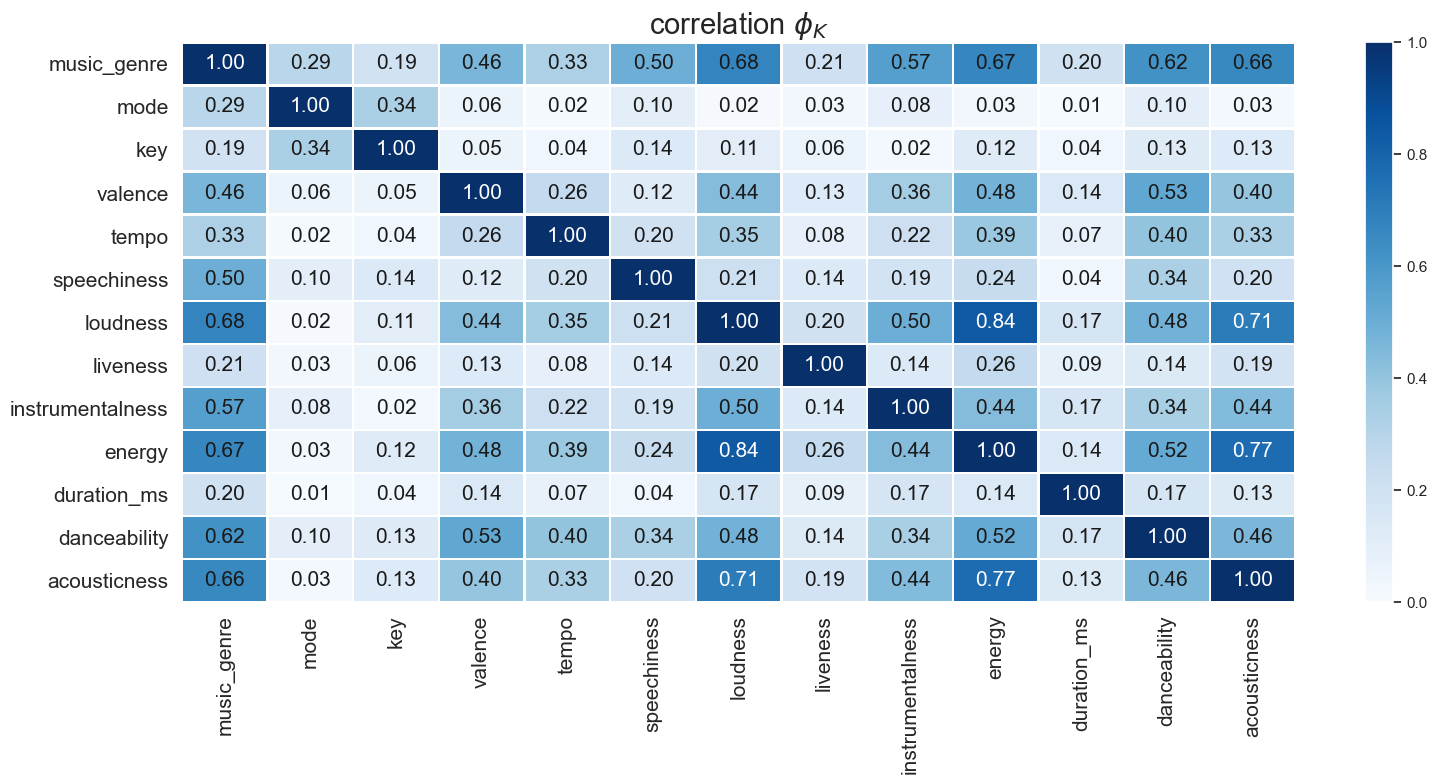

In [37]:
phik_corrs = headon_research_train_sample.phik_matrix()
plot_correlation_matrix(phik_corrs.values, 
                        x_labels=phik_corrs.columns, 
                        y_labels=phik_corrs.index, 
                        vmin=0, vmax=1, color_map="Blues", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(16, 8))
plt.tight_layout()


interval columns not set, guessing: ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'key', 'mode']


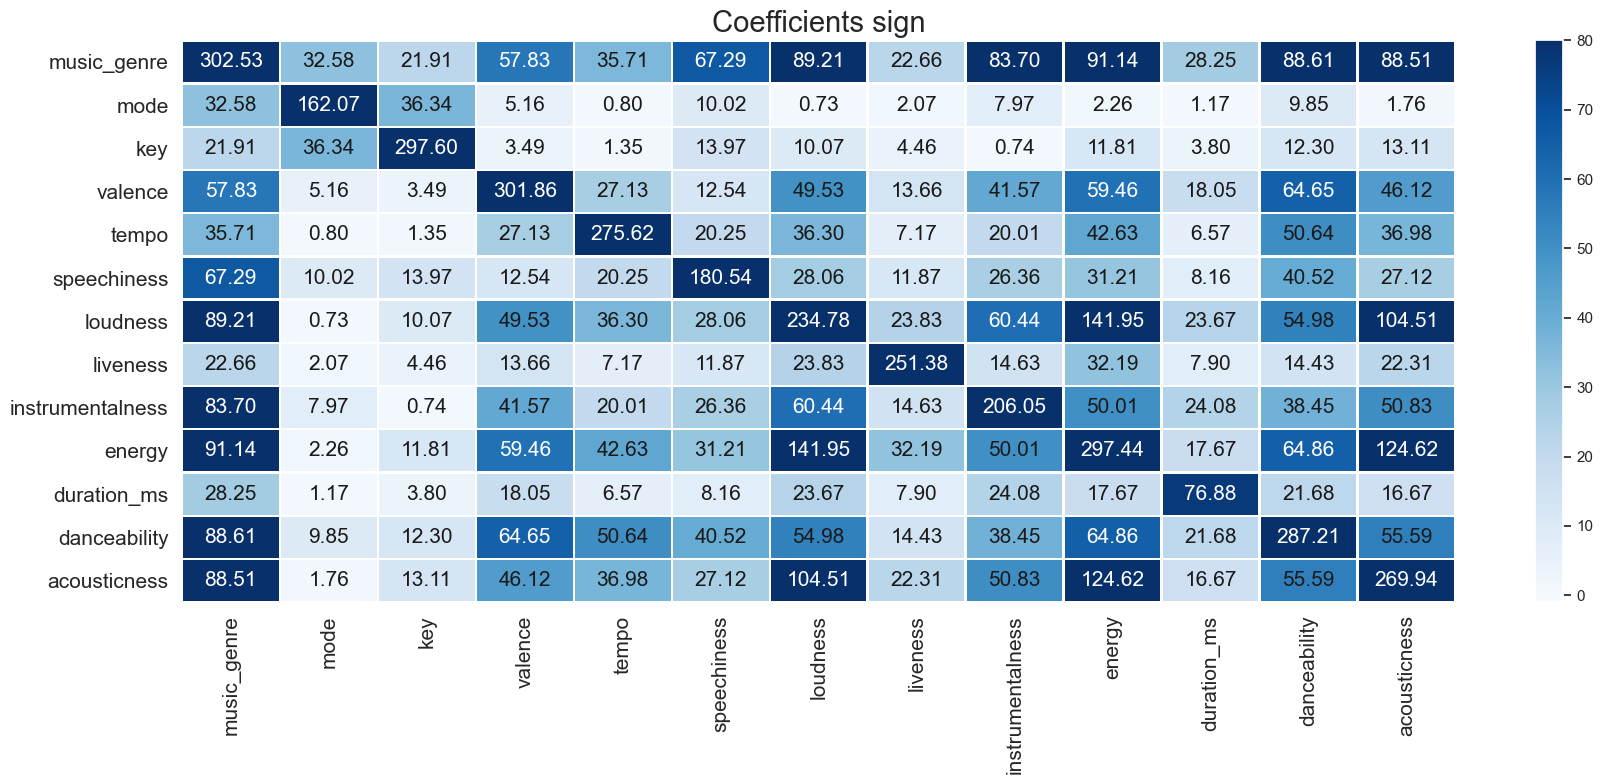

In [38]:
sign_overview = headon_research_train_sample.significance_matrix()#

plot_correlation_matrix(sign_overview.fillna(0).values, 
                        x_labels=sign_overview.columns, 
                        y_labels=sign_overview.index, 
                        vmin=-1, vmax=80, title="Coefficients sign", 
                        color_map = 'Blues',
                        usetex=False, fontsize_factor=1.5, figsize=(18, 8))
plt.tight_layout()


interval columns not set, guessing: ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'key', 'mode']


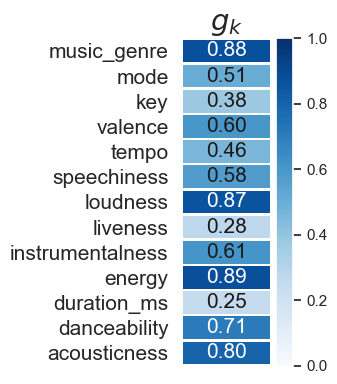

In [39]:
correlation, labels = headon_research_train_sample.global_phik()
plot_correlation_matrix(correlation, 
                        x_labels=[''], y_labels=labels, 
                        vmin=0, vmax=1, figsize=(3.5,4),
                        color_map="Blues", title=r"$g_k$",
                        fontsize_factor=1.5)
plt.tight_layout()

Судя по значения корреляции, у в датасете присутсвует мултиколлениарность признаков:
* energy + loudness
* acousticness + loudness
* energy + acousticness

Попробуйем исключить loudness и acousticness, оставив только energy, так как у последнего наибольший коэффициент корреляции с целевым признаком

interval columns not set, guessing: ['danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence', 'key', 'mode']


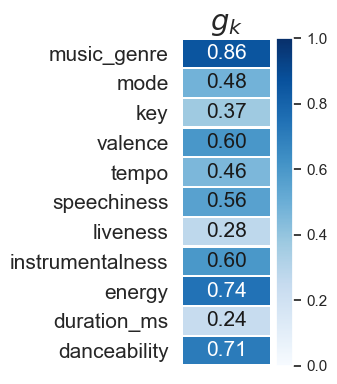

In [40]:
headon_temp = headon_research_train_sample.copy()
headon_temp = headon_temp.drop(columns=["loudness", "acousticness"])
temp_correlation, temp_labels = headon_temp.global_phik()
plot_correlation_matrix(temp_correlation, 
                        x_labels=[''], y_labels=temp_labels, 
                        vmin=0, vmax=1, figsize=(3.5,4),
                        color_map="Blues", title=r"$g_k$",
                        fontsize_factor=1.5)
plt.tight_layout()

## Headon Models research

### OneVsRestClassifier

In [41]:
def checkLinearSVCOVR(vfeatures, vtarget, n_trials, oversampling=False):

    def objectiveLr(trial):
        target = vtarget.copy()
        features = vfeatures.copy()

        c_value = trial.suggest_float('c_value', 0, 1.5)

        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        f1_scores = []
        for train_index, test_index in skf.split(features, target):
            skf_train_features = features.iloc[train_index]
            skf_test_features = features.iloc[test_index]
    
            skf_train_target = target.iloc[train_index]
            skf_test_target = target.iloc[test_index]

            if oversampling:
                ada = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)
                skf_train_features, skf_train_target = ada.fit_resample(skf_train_features, skf_train_target)

            model_ovr = OneVsRestClassifier(LinearSVC(C=c_value, loss = "hinge", random_state = 42, max_iter=5000))
            
            model_ovr.fit(skf_train_features, skf_train_target)
            predicted = model_ovr.predict(skf_test_features)
            f1score_temp = f1_score(skf_test_target, predicted, average='micro')
            f1_scores.append(f1score_temp)

        return np.mean(f1_scores)
    
    study = optuna.create_study(direction="maximize")  # Create a new study.
    study.optimize(objectiveLr, n_trials=n_trials)  # Invoke optimization of the objective function.

    c_value = study.best_trial.params['c_value']
    model_ovr = OneVsRestClassifier(LinearSVC(C=c_value, loss = "hinge", random_state = 42, max_iter=5000))
    checkModel(vfeatures, vtarget, model_ovr)

    return model_ovr, study

def getOVR(features, target, path2model, n_trials=3, oversampling=False):
    target_name = "music_genre"
    try:
        modelOneVrRest = load('./config/'+path2model) 
        checkModel(features, target, modelOneVrRest)
    except FileNotFoundError:
        print("Build new modelOneVrRest model")
        modelOneVrRest, studyOneVrRest = checkLinearSVCOVR(features, target, n_trials, oversampling=oversampling)
        dump(modelOneVrRest, './config/'+path2model) 

    return modelOneVrRest

### LogisticRegression

In [42]:
def checkLogisticRegression(vfeatures, vtarget, n_trials, oversampling=False):
    def objectiveLr(trial):
        target = vtarget.copy()
        features = vfeatures.copy()

        max_iter = trial.suggest_int('max_iter', 1000, 5000)
        solver = trial.suggest_categorical('solver', ['lbfgs','newton-cg','sag', 'saga'])
        multi_class = trial.suggest_categorical('multi_class', ['ovr', 'multinomial'])
        class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])
        cvalue = trial.suggest_float('cvalue', 0.5, 1.9)
    
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        f1_scores = []
        for train_index, test_index in skf.split(features, target):
            skf_train_features = features.iloc[train_index]
            skf_test_features = features.iloc[test_index]
    
            skf_train_target = target.iloc[train_index]
            skf_test_target = target.iloc[test_index]

            if oversampling:
                ada = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)
                skf_train_features, skf_train_target = ada.fit_resample(skf_train_features, skf_train_target)


            model_ovr = LogisticRegression(multi_class=multi_class, max_iter=max_iter, solver=solver, class_weight=class_weight, C=cvalue)
            model_ovr.fit(skf_train_features, skf_train_target)
            predicted = model_ovr.predict(skf_test_features)
            f1score_temp = f1_score(skf_test_target, predicted, average='micro')
            f1_scores.append(f1score_temp)

        return np.mean(f1_scores)
    
    studyLR = optuna.create_study(direction="maximize")  # Create a new study.
    studyLR.optimize(objectiveLr, n_trials=n_trials)  # Invoke optimization of the objective function.

    max_iter = studyLR.best_trial.params['max_iter']
    solver = studyLR.best_trial.params['solver']
    multi_class = studyLR.best_trial.params['multi_class']
    class_weight = studyLR.best_trial.params['class_weight']
    cvalue = studyLR.best_trial.params['cvalue']

    model_ovr = LogisticRegression(multi_class=multi_class, max_iter=max_iter, solver=solver, class_weight=class_weight, C=cvalue)
    checkModel(vfeatures, vtarget, model_ovr)

    return model_ovr, studyLR

def getLogisticReg(features, target, path2model, force=False, n_trials=3, oversampling=False):
    try:
        if force:
            modelLR, studyLR = checkLogisticRegression(features, target, n_trials, oversampling=oversampling)
        else:
            modelLR = load('./config/' + path2model) 

        checkModel(features, target, modelLR)
    except FileNotFoundError:
        print("Build new LogisticRegression model")
        modelLR, studyLR = checkLogisticRegression(features, target, n_trials, oversampling=oversampling)
        dump(modelLR, './config/' + path2model) 

    return modelLR

### ExtraTreeClassifier

In [43]:
def checkExtraTreeClassifier(vfeatures, vtarget, n_trials, oversampling=False):

    def objectiveETC(trial):
        target = vtarget
        features = vfeatures
    
        criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
        splitter = trial.suggest_categorical('splitter', ['best', 'random'])
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        f1_scores = []
        for train_index, test_index in skf.split(features, target):
            skf_train_features = features.iloc[train_index]
            skf_test_features = features.iloc[test_index]
    
            skf_train_target = target.iloc[train_index]
            skf_test_target = target.iloc[test_index]

            if oversampling:
                ada = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)
                skf_train_features, skf_train_target = ada.fit_resample(skf_train_features, skf_train_target)
            
            model_ovr = ExtraTreeClassifier(criterion=criterion, splitter=splitter)
            model_ovr.fit(skf_train_features, skf_train_target)
            predicted = model_ovr.predict(skf_test_features)
            f1score_temp = f1_score(skf_test_target, predicted, average='weighted')
            f1_scores.append(f1score_temp)
    
        return np.mean(f1_scores)
    
    studyETC = optuna.create_study(direction="maximize")  # Create a new study.
    studyETC.optimize(objectiveETC, n_trials=n_trials)  # Invoke optimization of the objective function.

    criterion = studyETC.best_trial.params['criterion']
    splitter = studyETC.best_trial.params['splitter']
    model_ovr = ExtraTreeClassifier(criterion=criterion, splitter=splitter)
    checkModel(vfeatures, vtarget, model_ovr)
    
    return model_ovr, studyETC

def getCheckExtraTreeClassifier(vfeatures, vtarget, path2model, force=False, n_trials=3, oversampling=False):
    try:
        if force:
            model, studyLR = checkExtraTreeClassifier(vfeatures, vtarget, n_trials, oversampling=oversampling)
        else:
            model = load('./config/' + path2model) 
        checkModel(vfeatures, vtarget, model)
    except FileNotFoundError:
        print("Build new checkExtraTreeClassifier model")
        model, studyLR = checkExtraTreeClassifier(vfeatures, vtarget, n_trials, oversampling=oversampling)
        dump(model, './config/' + path2model) 

    return model

### Decision Tree Classifier

In [44]:
def checkDecisionTreeClassifier(vfeatures, vtarget, n_trials, oversampling=False):
    def objective(trial):
        target = vtarget
        features = vfeatures

        criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
        splitter = trial.suggest_categorical('splitter', ['best', 'random'])
        
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        f1_scores = []
        for train_index, test_index in skf.split(features, target):
            skf_train_features = features.iloc[train_index]
            skf_test_features = features.iloc[test_index]
    
            skf_train_target = target.iloc[train_index]
            skf_test_target = target.iloc[test_index]
            if oversampling:
                ada = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)
                skf_train_features, skf_train_target = ada.fit_resample(skf_train_features, skf_train_target)

            model_ovr = DecisionTreeClassifier(criterion=criterion, splitter=splitter)
            model_ovr.fit(skf_train_features, skf_train_target)
            predicted = model_ovr.predict(skf_test_features)
            f1score_temp = f1_score(skf_test_target, predicted, average='weighted')
            f1_scores.append(f1score_temp)
    
        return np.mean(f1_scores)
    
    study = optuna.create_study(direction="maximize")  # Create a new study.
    study.optimize(objective, n_trials=n_trials)  # Invoke optimization of the objective function.

    criterion = study.best_trial.params['criterion']
    splitter = study.best_trial.params['splitter']
    model_ovr = DecisionTreeClassifier(criterion=criterion, splitter=splitter)
    checkModel(vfeatures, vtarget, model_ovr)
    
    return model_ovr, study

def getDecisionTree(feature, target, path2model, force=False, n_trials=3, oversampling=False):
    try:
        if force:
            model, studyLR = checkDecisionTreeClassifier(feature, target, n_trials, oversampling=oversampling)
        else:
            model = load('./config/' + path2model) 
        checkModel(feature, target, model)
    except FileNotFoundError:
        print("Build new checkDecisionTreeClassifier model")
        model, studyLR = checkDecisionTreeClassifier(feature, target, n_trials, oversampling=oversampling)
        dump(model, './config/' + path2model) 

    return model

### Random Forest

In [45]:
def checkRandomForestClassifier(vfeatures, vtarget, n_trials, oversampling=False):
    def objective(trial):
        target = vtarget.copy()
        features = vfeatures.copy()
    
        criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
        n_estimators = trial.suggest_int('n_estimators', 100, 2000)
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        f1_scores = []
        for train_index, test_index in skf.split(features, target):
            skf_train_features = features.iloc[train_index]
            skf_test_features = features.iloc[test_index]
    
            skf_train_target = target.iloc[train_index]
            skf_test_target = target.iloc[test_index]

            if oversampling:
                ada = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)
                skf_train_features, skf_train_target = ada.fit_resample(skf_train_features, skf_train_target)
            
            model_ovr = RandomForestClassifier(criterion=criterion, n_estimators=n_estimators, n_jobs=-1)
            model_ovr.fit(skf_train_features, skf_train_target)
            predicted = model_ovr.predict(skf_test_features)
            f1score_temp = f1_score(skf_test_target, predicted, average='weighted')
            f1_scores.append(f1score_temp)
    
        return np.mean(f1_scores)
    
    study = optuna.create_study(direction="maximize")  # Create a new study.
    study.optimize(objective, n_trials=n_trials)  # Invoke optimization of the objective function.

    criterion = study.best_trial.params['criterion']
    n_estimators = study.best_trial.params['n_estimators']
    model_ovr = RandomForestClassifier(criterion=criterion, n_estimators=n_estimators)
    checkModel(vfeatures, vtarget, model_ovr)
    
    return model_ovr, study

def getRandomForest(features, target, path2model, force=False, n_trials=3, oversampling=False):
    try:
        if force:
            model, studyLR = checkRandomForestClassifier(features, target, n_trials, oversampling=oversampling)
        else:
            model = load('./config/' + path2model)
        checkModel(features, target, model)
    except FileNotFoundError:
        print("Build new checkRandomForestClassifier model")
        model, studyLR = checkRandomForestClassifier(features, target, n_trials, oversampling=oversampling)
        dump(model, './config/' + path2model) 

    return model

### ExtraTreesClassifier

In [46]:
def checkExtraTreesClassifierFor(vfeatures, vtarget, n_trials, oversampling=False):

    def objectiveETSC(trial):
        target = vtarget
        features = vfeatures
    
        criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
        n_estimators = trial.suggest_int('n_estimators', 100, 2000)
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        f1_scores = []
        for train_index, test_index in skf.split(features, target):
            skf_train_features = features.iloc[train_index]
            skf_test_features = features.iloc[test_index]
    
            skf_train_target = target.iloc[train_index]
            skf_test_target = target.iloc[test_index]

            if oversampling:
                ada = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)
                skf_train_features, skf_train_target = ada.fit_resample(skf_train_features, skf_train_target)

            model_ovr = ExtraTreesClassifier(criterion=criterion, n_estimators=n_estimators, n_jobs=-1)
            model_ovr.fit(skf_train_features, skf_train_target)
            predicted = model_ovr.predict(skf_test_features)
            f1score_temp = f1_score(skf_test_target, predicted, average='weighted')
            f1_scores.append(f1score_temp)
    
        return np.mean(f1_scores)
    
    studyETSC = optuna.create_study(direction="maximize")  # Create a new study.
    studyETSC.optimize(objectiveETSC, n_trials=n_trials)  # Invoke optimization of the objective function.

    criterion = studyETSC.best_trial.params['criterion']
    n_estimators = studyETSC.best_trial.params['n_estimators']
    model_ovr = ExtraTreesClassifier(criterion=criterion, n_estimators=n_estimators)
    checkModel(vfeatures, vtarget, model_ovr)
    
    return model_ovr, studyETSC

def getExtraTrees(vfeatures, target, path2model, force=False, t_trials=3, oversampling=False):
    try:
        if force:
            model, studyLR = checkExtraTreesClassifierFor(vfeatures, target, t_trials, oversampling=oversampling)
        else:
            model = load('./config/' + path2model) 
        checkModel(vfeatures, target, model)
    except FileNotFoundError:
        print("Build new checkExtraTreesClassifierFor model")
        model, studyLR = checkExtraTreesClassifierFor(vfeatures, target, t_trials, oversampling=oversampling)
        dump(model, './config/' + path2model) 

    return model

target_name = "music_genre"
feature_names = train_data.select_dtypes(include='number').columns.tolist()
modelETSC = None

### Cat Boosting

In [47]:
def checkCatBoosting(vfeatures, vtarget, n_trials, oversampling=False):
    def objective(trial):
        target = vtarget
        features = vfeatures
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        iterations = trial.suggest_int("iterations", 50, 200)
        
        f1_scores = []
        for train_index, test_index in skf.split(features, target):
            
            skf_train_features = features.iloc[train_index]
            skf_test_features = features.iloc[test_index]

            
            skf_train_target = target.iloc[train_index]
            skf_test_target = target.iloc[test_index]

            if oversampling:
                ada = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)
                skf_train_features, skf_train_target = ada.fit_resample(skf_train_features, skf_train_target)

            model_ovr = OneVsRestClassifier(estimator=CatBoostClassifier(iterations=iterations,random_state=42, verbose=False), n_jobs=-1)
            model_ovr.fit(skf_train_features, skf_train_target)
            predicted = model_ovr.predict(skf_test_features)
            f1score_temp = f1_score(skf_test_target, predicted, average='micro')
            f1_scores.append(f1score_temp)
    
        return np.mean(f1_scores)
    
    study = optuna.create_study(direction="maximize")  # Create a new study.
    study.optimize(objective, n_trials=n_trials)  # Invoke optimization of the objective function.

    iterations = study.best_trial.params['iterations']
    model_ovr = OneVsRestClassifier(estimator=CatBoostClassifier(iterations=iterations,random_state=42, verbose=False))
    checkModel(vfeatures, vtarget, model_ovr)

    return model_ovr, study

def getCatBoost(vfeatures, vtarget, path2model, force=False, n_trials=3, oversampling=False):
    try:
        if force:
            model, studyLR = checkCatBoosting(vfeatures, vtarget, n_trials, oversampling=oversampling)
        else:
            model = load('./config/' + path2model) 
        checkModel(vfeatures, vtarget, model)
    except FileNotFoundError:
        print("Build new checkCatBoosting model")
        model, studyLR = checkCatBoosting(vfeatures, vtarget, n_trials, oversampling=oversampling)
        dump(model, './config/' + path2model) 
    return model

In [48]:
stackModel_features = headon_research_train_sample.copy() 
stackModel_target = stackModel_features.pop("music_genre")

### Stacking Classifier

In [49]:
def getStackResult(feature, target, model_list, weights, dump_path):
    try:
        clf = load(dump_path) 
        checkModel(feature, target, clf)
    except FileNotFoundError:
        target_name = "music_genre"

        clf = EnsembleVoteClassifier(model_list, weights=weights, voting='soft')
        
        X = feature
        y = target

        X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
        clf.fit(X_train, y_train)
        predicted = clf.predict(X_test)
        f1score = f1_score(y_test, predicted, average='micro')
        print("F1 Score result:", f1score)
        print(classification_report(y_test, predicted, zero_division=1.0))
        dump(clf, dump_path) 

    return clf

stackModel = None

In [ ]:
if True:
    stackModel_features = headon_research_train_sample.copy() 
    stackModel_target = stackModel_features.pop("music_genre")

    modelCatBoost = getCatBoost(stackModel_features, stackModel_target, "v1/modelCatBoost.joblib")
    modelETSC = getExtraTrees(stackModel_features, stackModel_target, "v1/modelETSC.joblib")
    modeRFC = getRandomForest(stackModel_features, stackModel_target, "v1/modeRFC.joblib")
    modelDTC = getDecisionTree(stackModel_features, stackModel_target, "v1/modelDTC.joblib")
    modelETC = getCheckExtraTreeClassifier(stackModel_features, stackModel_target, 'v1/modelETC.joblib')
    modelLR = getLogisticReg(stackModel_features, stackModel_target, "v1/modelLR.joblib")
    modelOneVrRest = getOVR(stackModel_features, stackModel_target, "v1/modelOneVrRest.joblib")
    
    model_list = [
                modelLR,
                modeRFC,
                modelETSC,
                modelCatBoost
            ]

    stackModel = getStackResult(stackModel_features, stackModel_target, model_list, [1, 1, 1, 1.5], "./config/v1/clf.joblib")
stackModel

Result f1 score: 0.4544371239963299
              precision    recall  f1-score   support

 Alternative       0.35      0.29      0.32       663
       Anime       0.50      0.47      0.49       469
       Blues       0.47      0.58      0.52       724
   Classical       0.81      0.81      0.81       344
     Country       0.44      0.54      0.48       521
  Electronic       0.59      0.69      0.64       674
     Hip-Hop       0.28      0.08      0.12       277
        Jazz       0.40      0.30      0.34       305
         Rap       0.47      0.71      0.57       595
        Rock       0.20      0.09      0.13       527

    accuracy                           0.48      5099
   macro avg       0.45      0.46      0.44      5099
weighted avg       0.45      0.48      0.45      5099

Result f1 score: 0.41774102995335555
              precision    recall  f1-score   support

 Alternative       0.33      0.26      0.29       705
       Anime       0.51      0.42      0.46       437
     

Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.


Result f1 score: 0.17480075686868646
              precision    recall  f1-score   support

 Alternative       0.19      0.30      0.23       658
       Anime       0.04      0.06      0.05       470
       Blues       0.14      0.00      0.01       715
   Classical       0.58      0.88      0.70       341
     Country       0.13      0.34      0.19       496
  Electronic       0.41      0.64      0.50       655
     Hip-Hop       0.03      0.03      0.03       295
        Jazz       1.00      0.00      0.00       332
         Rap       0.33      0.00      0.00       609
        Rock       0.16      0.05      0.08       528

    accuracy                           0.23      5099
   macro avg       0.30      0.23      0.18      5099
weighted avg       0.28      0.23      0.17      5099



In [ ]:
def makeSubmit(model, dataset, feature_names, filename):
    temp = dataset.copy()
    test_predicted = model.predict(dataset[feature_names])
    temp["music_genre"] = test_predicted
    temp[["instance_id", "music_genre"]].to_csv(filename, index=False)
    return temp

if stackModel != None:
    temp_test_data = test_data.copy()
    temp_test_data["instance_id"] = original_test_data["instance_id"]
    makeSubmit(stackModel, temp_test_data, stackModel_features.columns, 'prediction_v44.csv')

### Headon way results

Были проверены 7 моделей + ансамбль из лучших моделей:
* OneVrRest f1 score: 0.19290730152999486
* Logictic regression f1_score: 0.36142227953006634 
* Random forest f1_score: 0.4393991732125192
* Extra Tree f1 score: 0.2941580909632646
* Extra Trees Classifier f1 score: 0.4196622985188959
* Decision Tree f1_score: 0.3204146613933921
* Cat boost f1_score: 0.46235715326384513 
* Final Model f1_score: 0.4781329672484801


## Model Improvements

### Target Feature Disbalance

In [ ]:
target_disbalance_sample = train_data.copy()
target_disbalance_sample.groupby('music_genre').agg({'music_genre': ["count"]}).plot.pie(y='music_genre', figsize=(12, 12))

In [ ]:
balanced_train_dataset_features = target_disbalance_sample.copy() 
balanced_train_dataset_target = balanced_train_dataset_features.pop("music_genre")

RESEARCH_WITH_REBALANCED_CLASSES = True
if RESEARCH_WITH_REBALANCED_CLASSES:
    try:
        modelOneVrRestV2 = getOVR(balanced_train_dataset_features, balanced_train_dataset_target, "v2/modelOneVrRest.joblib", oversampling=True)
        print("modelOneVrRest is loaded")
    except:
        print("modelOneVrRest is Error")
    
    try:
        modelLRV2 = getLogisticReg(balanced_train_dataset_features, balanced_train_dataset_target, "v2/modelLR.joblib", oversampling=True)
        print("modelLR is loaded")
    except:
        print("modelLR is Error")
    
    try:
        modelETCV2 = getCheckExtraTreeClassifier(balanced_train_dataset_features, balanced_train_dataset_target, 'v2/modelETC.joblib', oversampling=True)
        print("modelETC is loaded")
    except:
        print("modelETC is Error")
    
    try:
        modelDTCV2 = getDecisionTree(balanced_train_dataset_features, balanced_train_dataset_target, "v2/modelDTC.joblib", oversampling=True)
        print("modelDTC is loaded")
    except:
        print("modelDTC is Error")
    
    try:
        modeRFCV2 = getRandomForest(balanced_train_dataset_features, balanced_train_dataset_target, "v2/modeRFC.joblib", oversampling=True)
        print("modeRFC is loaded")
    except:
        print("modeRFC is Error")
    
    try:
        modelETSCV2 = getExtraTrees(balanced_train_dataset_features, balanced_train_dataset_target, "v2/modelETSC.joblib", oversampling=True)
        print("modelETSC is loaded")
    except:
        print("modelETSC is Error")

    try:
        modelCatBoostV2 = getCatBoost(balanced_train_dataset_features, balanced_train_dataset_target, "v2/modelCatBoost.joblib", oversampling=True)
        print("modelCatBoostV2 is loaded")
    except:
        print("Error")

In [ ]:
if True:
    target_disbalance_sample_target = balanced_train_dataset_target
    target_disbalance_sample = balanced_train_dataset_features
    ada = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)
    balanced_features, balances_target = ada.fit_resample(target_disbalance_sample, target_disbalance_sample_target)

    
    model_list = [
            modelLRV2,
            modeRFCV2,
            modelDTCV2,
            modelCatBoostV2
        ]

    stackModelV2 = getStackResult(stackModel_features, stackModel_target, model_list, [1, 1, 1, 1.5], "./config/v2/clf.joblib")

    temp_test_data = test_data.copy()
    temp_test_data["instance_id"] = original_test_data["instance_id"]
    makeSubmit(stackModelV2, temp_test_data, balanced_train_dataset_features.columns, 'prediction_v46.csv')

#### Disbalance validation results
Были проверены 7 моделей + ансамбль из лучших моделей:
* OneVrRest f1 score: 0.23163651641677221
* Logictic regression f1_score: 0.37110867427430577
* Random forest f1_score: 0.42065481272188504
* Extra Tree f1 score: 0.287008510044746
* Extra Trees Classifier f1 score: 0.287008510044746
* Decision Tree f1_score: 0.43852018401402865
* Cat boost f1_score: 0.4360596368994721
* Final Model f1_score: 0.4098842910374583


### Feature Implementation
#### Additional Category Features

In [ ]:
train_newfeatures_data = train_data.copy()
test_newfeatures_data = train_data.copy()
train_newfeatures_data

In [ ]:
def showCorrelationsForCategorialFeatures(dataset):
    eda_train_sample = dataset.copy()
    eda_train_sample["is_acousticness_sf"] = eda_train_sample["acousticness"].apply(lambda v: 1 if v > 0.5 else 0)
    eda_train_sample["is_danceable_sf"] = eda_train_sample["danceability"].apply(lambda v: 1 if v > 0.5 else 0)
    eda_train_sample["is_energable_sf"] = eda_train_sample["energy"].apply(lambda v: 1 if v > 0.6 else 0)
    eda_train_sample["is_instrumentable_sf"] = eda_train_sample["instrumentalness"].apply(lambda v: 1 if v > 0.5 else 0)
    eda_train_sample["is_music"] = eda_train_sample["instrumentalness"].apply(lambda v: 1 if v < 0.33 else 0)
    eda_train_sample["is_song"] = eda_train_sample["instrumentalness"].apply(lambda v: 1 if v >= 0.33 and v <= 0.66 else 0)
    eda_train_sample["is_fast"] = eda_train_sample["tempo"].apply(lambda v: 1 if v >= 120 else 0)
    eda_train_sample["is_positive"] = eda_train_sample["valence"].apply(lambda v: 1 if v >= 0.5 else 0)

    sign_overview = eda_train_sample.significance_matrix()
    plot_correlation_matrix(sign_overview.fillna(0).values, 
                            x_labels=sign_overview.columns, 
                            y_labels=sign_overview.index, 
                            vmin=-1, vmax=80, title="Coefficients sign", 
                            color_map = 'Blues',
                            usetex=False, fontsize_factor=1.5, figsize=(18, 8))
    plt.tight_layout()
    return eda_train_sample

train_with_newfeatures_data = showCorrelationsForCategorialFeatures(train_newfeatures_data)

In [ ]:
try_with_new_category = train_with_newfeatures_data[["is_music", "is_instrumentable_sf", 'is_energable_sf', 'is_danceable_sf', 'is_acousticness_sf', 'speechiness', 'loudness', 'liveness', 'instrumentalness', 'energy', 'danceability', 'acousticness', 'music_genre']]
try_with_new_category

In [ ]:
try_with_new_category[try_with_new_category['music_genre'] == 'Rock']

In [ ]:
target_name = "music_genre"
feature_names = try_with_new_category.select_dtypes(include='number').columns.tolist()

new_cat_features_train_dataset_features = try_with_new_category.copy() 
new_cat_train_dataset_target = new_cat_features_train_dataset_features.pop("music_genre")

RESEARCH_WITH_NEW_CAT_FEATURES = True
if RESEARCH_WITH_NEW_CAT_FEATURES:
    try:
        modelOneVrRestV3 = getOVR(new_cat_features_train_dataset_features, new_cat_train_dataset_target, "v3/modelOneVrRest.joblib")
        print("modelOneVrRest is loaded")
    except:
        print("modelOneVrRest is Error")
    
    try:
        modelLRV3 = getLogisticReg(new_cat_features_train_dataset_features, new_cat_train_dataset_target, "v3/modelLR.joblib")
        print("modelLR is loaded")
    except:
        print("modelLR is Error")
    
    try:
        modelETCV3 = getCheckExtraTreeClassifier(new_cat_features_train_dataset_features, new_cat_train_dataset_target, 'v3/modelETC.joblib')
        print("modelETC is loaded")
    except:
        print("modelETC is Error")
    
    try:
        modelDTCV3 = getDecisionTree(new_cat_features_train_dataset_features, new_cat_train_dataset_target, "v3/modelDTC.joblib")
        print("modelDTC is loaded")
    except:
        print("modelDTC is Error")
    
    try:
        modeRFCV3 = getRandomForest(new_cat_features_train_dataset_features, new_cat_train_dataset_target, "v3/modeRFC.joblib")
        print("modeRFC is loaded")
    except:
        print("modeRFC is Error")
    
    try:
        modelETSCV3 = getExtraTrees(new_cat_features_train_dataset_features, new_cat_train_dataset_target, "v3/modelETSC.joblib")
        print("modelETSC is loaded")
    except:
        print("modelETSC is Error")

    try:
        modelCatBoostV3 = getCatBoost(new_cat_features_train_dataset_features, new_cat_train_dataset_target, "v3/modelCatBoost.joblib")
        print("modelCatBoostV2 is loaded")
    except:
        print("Error")

In [ ]:
model_listV3 = [
            modelLRV3,
            modeRFCV3,
            modelETSCV3,
            modelCatBoostV3
        ]

stackModelv3 = getStackResult(new_cat_features_train_dataset_features, new_cat_train_dataset_target, model_listV3, [1, 1, 1, 1.5], "./config/v3/clf.joblib")

temp_test_data = test_data.copy()
temp_test_data = showCorrelationsForCategorialFeatures(temp_test_data)
temp_test_data["instance_id"] = original_test_data["instance_id"]
makeSubmit(stackModelv3, temp_test_data, new_cat_features_train_dataset_features.columns, 'prediction_v45.csv')

#### New categorial features results

#### New category features validation results
Были проверены 7 моделей + ансамбль из лучших моделей:
* OneVrRest f1 score: 0.11074648978539833
* Logictic regression f1_score: 0.324932799064848
* Random forest f1_score: 0.42065481272188504
* Extra Tree f1 score: 0.2921260001325759
* Extra Trees Classifier f1 score: 0.37437239655946314
* Decision Tree f1_score: 0.28737490065862875
* Cat boost f1_score: 0.40442663107442944
* Final Model f1_score: 0.42753481074720534


#### Additional Numeric features

In [ ]:
def showCorrelationsForNumericFeatures(dataset):
    eda_train_sample = dataset.copy()

    temp_keys = pd.get_dummies(eda_train_sample["key"], drop_first=True)
    eda_train_sample[temp_keys.columns] = temp_keys

    temp_mode = pd.get_dummies(eda_train_sample["mode"], drop_first=True)
    eda_train_sample[temp_mode.columns] = temp_mode

    eda_train_sample = eda_train_sample.copy().drop(['key', 'mode'], axis=1)
    eda_train_sample = eda_train_sample.copy().drop(['duration_ms'], axis=1)

    eda_train_sample['synthetics_feature_9'] = eda_train_sample['liveness']/(1+eda_train_sample['loudness'])
    eda_train_sample['synthetics_feature_10'] = eda_train_sample['tempo']/(1+eda_train_sample['tempo'])
    eda_train_sample = eda_train_sample.copy().drop(['loudness', 'tempo', 'tempo'], axis=1)

    correlation, labels = eda_train_sample.global_phik()
    plot_correlation_matrix(correlation, 
                            x_labels=[''], y_labels=labels, 
                            vmin=0, vmax=1, figsize=(5,10),
                            color_map="Blues", title=r"$g_k$",
                            fontsize_factor=1.5)
    plt.tight_layout()
    return eda_train_sample

train_data_with_pol_features_v3 = showCorrelationsForNumericFeatures(train_data)
train_data_with_pol_features_v3["music_genre"] = train_data.copy()["music_genre"]
train_data_with_pol_features_v3.info()

In [ ]:
train_data_with_pol_features_v3 = train_data_with_pol_features_v3.rename(columns={1.0: "f1", 2.0: "f2", 3.0: "f3", 4.0: "f4", 5.0: "f5", 6.0: "f6", 7.0: "f7", 8.0: "f8", 9.0: "f9", 10.0: "f10", 11.0: "f11", 12.0: "f12"})
train_data_with_pol_features_v3.info()

In [ ]:
new_num_features_train_dataset_features = train_data_with_pol_features_v3.copy() 
new_num_train_dataset_target = new_num_features_train_dataset_features.pop("music_genre")

RESEARCH_WITH_NEW_NUM_FEATURES = True
if RESEARCH_WITH_NEW_NUM_FEATURES:
    try:
        modelOneVrRestV3 = getOVR(new_num_features_train_dataset_features, new_num_train_dataset_target, "v4/modelOneVrRest.joblib")
        print("modelOneVrRest is loaded")
    except:
        print("modelOneVrRest is Error")
    
    try:
        modelLRV4 = getLogisticReg(new_num_features_train_dataset_features, new_num_train_dataset_target, "v4/modelLR.joblib")
        print("modelLR is loaded")
    except:
        print("modelLR is Error")
    
    try:
        modelETCV4 = getCheckExtraTreeClassifier(new_num_features_train_dataset_features, new_num_train_dataset_target, 'v4/modelETC.joblib')
        print("modelETC is loaded")
    except:
        print("modelETC is Error")
    
    try:
        modelDTCV4 = getDecisionTree(new_num_features_train_dataset_features, new_num_train_dataset_target, "v4/modelDTC.joblib")
        print("modelDTC is loaded")
    except:
        print("modelDTC is Error")
    
    try:
        modeRFCV4 = getRandomForest(new_num_features_train_dataset_features, new_num_train_dataset_target, "v4/modeRFC.joblib")
        print("modeRFC is loaded")
    except:
        print("modeRFC is Error")
    
    try:
        modelETSCV4 = getExtraTrees(new_num_features_train_dataset_features, new_num_train_dataset_target, "v4/modelETSC.joblib")
        print("modelETSC is loaded")
    except:
        print("modelETSC is Error")

    try:
        modelCatBoostV4 = getCatBoost(new_num_features_train_dataset_features, new_num_train_dataset_target, "v4/modelCatBoost.joblib")
        print("modelCatBoostV2 is loaded")
    except:
        print("Error")

In [ ]:
model_listV4 = [
            modelLRV4,
            modeRFCV4,
            modelETSCV4,
            modelCatBoostV4
        ]

stackModelv4 = getStackResult(new_num_features_train_dataset_features, new_num_train_dataset_target, model_listV4, [1, 1, 1, 1.5], "./config/v4/clf.joblib")

temp_test_data = test_data.copy()
temp_test_data = showCorrelationsForNumericFeatures(temp_test_data)
temp_test_data["instance_id"] = original_test_data["instance_id"]
makeSubmit(stackModelv4, temp_test_data, new_num_features_train_dataset_features.columns, 'prediction_v45.csv')

#### New numeric features validation results
Были проверены 7 моделей + ансамбль из лучших моделей:
* OneVrRest f1 score: 0.0.1931319059775726
* Logictic regression f1_score: 0.35006121492619435
* Random forest f1_score: 0.4029150498507289 
* Extra Tree f1 score: 0.2960279114014821
* Extra Trees Classifier f1 score: 0.3940497376650219
* Decision Tree f1_score: 0.3141009872895729
* Cat boost f1_score: 0.42505052257479486
* Final Model f1_score: 0.4018701477728337


### Наилучшая модель
По итогам работы, была обнаружена наилучшая модель EnsembleVoteClassifier с F1 Score: 0.4781329672484801:
* LogisticRegression: (C=0.8876025374161937,max_iter=2084, multi_class='multinomial', solver='sag')
* RandomForestClassifier(n_estimators=1323)
* ExtraTreesClassifier(n_estimators=1163),
* OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x000002185C44B6D0>)], voting='soft',

In [ ]:
stackModel

## Выводы

Был проанализирован датасет с данными по музыкальным трекам.
В процессе анализа было было обнаружно:
* 3 фичи "instance_id", 'obtained_date', "track_name" - необходимо исключить из анализа. Первый - уникальен для каждой записи, второй содержит 4 уникальных значения и ни как не определеяет целевую переменную, "track_name" - интересен, но мало информативен и плохо описывает целевую переменную.
* duration_ms - содержит в себе отрицательные значения, которые были заменены на NaN и запулнены наиболее встречающимся значением.
* instrumentalness - содержит много выборосов, почти 25% от всего датасета. На данный момент, оставляем их как есть, так как исключать все строки из выборки - значит потерять много данных для обучения.
* в дата сете были обнаружены 3 аттрибута, имеющие мультиколлениарность. После анализа, выяснилось, что в случае исключения этих аттрибутов из выборки, проседала корреляция целевого признака, что ухудшило качество модели.

По итогу анализа данных, было решено подготовить данные для обучеющих моделей следующим образом.
Для числовых аттрибутов применить:
* IterativeImputer(max_iter=10, random_state=42) - для заполнения пропусков
* RobustScaler - для масштабирования занчений, чтобы уменьшить влияение выбросов на модели, так как некоторые аттирибуты содержали много выбросов
* drop_constants - для удаления аттрибутов с малой дисперсией данных, так как такие данные не несли бы в себе информации о целевой переменной.

Для категориальных переменных:
* SimpleImputer(strategy='most_frequent')
* OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

После подготовки данных, были выбраны следующие модели для обучения и были вычислены следующие занчение F1 Score:
* OneVrRest+LinearSVC f1 score: 0.19290730152999486
* Logictic regression f1_score: 0.36142227953006634 
* Random forest f1_score: 0.4393991732125192
* Extra Tree f1 score: 0.2941580909632646
* Extra Trees Classifier f1 score: 0.4196622985188959
* Decision Tree f1_score: 0.3204146613933921
* Cat boost f1_score: 0.46235715326384513 
* Final Model f1_score: 0.4781329672484801

Так же были попытка улучшить модель следующим образом:

1) После, была попытка исправить дисбаланс классов с помощью подхода SMOTE:
* OneVrRest f1 score: 0.23163651641677221
* Logictic regression f1_score: 0.37110867427430577
* Random forest f1_score: 0.42065481272188504
* Extra Tree f1 score: 0.287008510044746
* Extra Trees Classifier f1 score: 0.287008510044746
* Decision Tree f1_score: 0.43852018401402865
* Cat boost f1_score: 0.4360596368994721
* Final Model f1_score: 0.4098842910374583

2) Были добавлены новый категориальные признаки с результами :
* OneVrRest f1 score: 0.11074648978539833
* Logictic regression f1_score: 0.324932799064848
* Random forest f1_score: 0.42065481272188504
* Extra Tree f1 score: 0.2921260001325759
* Extra Trees Classifier f1 score: 0.37437239655946314
* Decision Tree f1_score: 0.28737490065862875
* Cat boost f1_score: 0.40442663107442944
* Final Model f1_score: 0.42753481074720534

3) Были добавлены новый числовые признаки с результами :
#### New numeric features validation results
Были проверены 7 моделей + ансамбль из лучших моделей:
* OneVrRest f1 score: 0.0.1931319059775726
* Logictic regression f1_score: 0.35006121492619435
* Random forest f1_score: 0.4029150498507289 
* Extra Tree f1 score: 0.2960279114014821
* Extra Trees Classifier f1 score: 0.3940497376650219
* Decision Tree f1_score: 0.3141009872895729
* Cat boost f1_score: 0.42505052257479486
* Final Model f1_score: 0.4018701477728337

### Наилучшая модель по итогу
По итогам работы, была обнаружена наилучшая модель EnsembleVoteClassifier с F1 Score: 0.4781329672484801:
* LogisticRegression: (C=0.8876025374161937,max_iter=2084, multi_class='multinomial', solver='sag')
* RandomForestClassifier(n_estimators=1323)
* ExtraTreesClassifier(n_estimators=1163),
* OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x000002185C44B6D0>)], voting='soft'


К сожалению, данная оценка не удовлентворительна и требуются доработки.
Необходимо сделать следующее:
* расширить датасет и добавить новые данные для улучшения качества обучения моделей.
* продолжить исследование и найти дополнительные аттрибуты для более качественного обучения.